# Q5 Clusttering technique used: DBSCAN with 2 clusters
## with pearson coefficient to verify the positive correlation

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('cleaned_data.csv')
df.head()

,Unnamed: 0,companies,prices,rated_by
0,0,Asus,349,138
1,1,Acer,857,994
2,2,Silver,349,5
3,3,Lenovo,699,710
4,4,Acer,796,517


In [3]:
df = df.drop(df.columns[[0]], axis=1)
df

,companies,prices,rated_by
0,Asus,349,138
1,Acer,857,994
2,Silver,349,5
3,Lenovo,699,710
4,Acer,796,517
5,Silver,999,5
6,Alienware,674,710
7,Dell,857,14
8,Acer,699,48
9,Lenovo,897,122


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

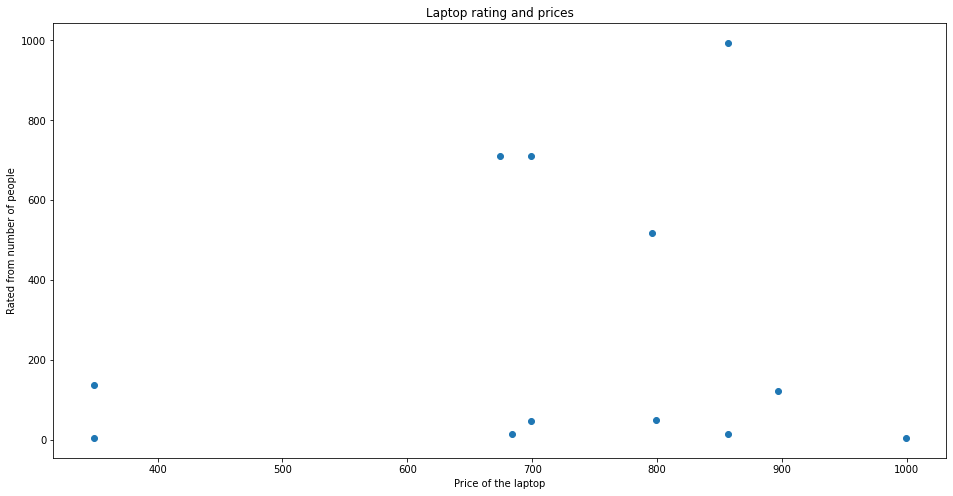

In [5]:
plt.figure(figsize=(16,8))
plt.scatter(df['prices'], df['rated_by'])
plt.xlabel('Price of the laptop')
plt.ylabel('Rated from number of people')
plt.title('Laptop rating and prices')
plt.show()

In [6]:
data = df[['prices', 'rated_by']]
data

,prices,rated_by
0,349,138
1,857,994
2,349,5
3,699,710
4,796,517
5,999,5
6,674,710
7,857,14
8,699,48
9,897,122


In [7]:
data = data.astype("float32", copy = False)
data

,prices,rated_by
0,349.0,138.0
1,857.0,994.0
2,349.0,5.0
3,699.0,710.0
4,796.0,517.0
5,999.0,5.0
6,674.0,710.0
7,857.0,14.0
8,699.0,48.0
9,897.0,122.0


In [8]:
stscaler = StandardScaler().fit(data)
data = stscaler.transform(data)
data

array([[-1.9495875 , -0.41123074],
       [ 0.70858413,  2.1136718 ],
       [-1.9495875 , -0.8035345 ],
       [-0.11817003,  1.2759706 ],
       [ 0.38939422,  0.70668757],
       [ 1.4516163 , -0.8035345 ],
       [-0.24898554,  1.2759706 ],
       [ 0.70858413, -0.7769876 ],
       [-0.11817003, -0.6766995 ],
       [ 0.917889  , -0.4584252 ],
       [ 0.4050921 , -0.6708002 ],
       [-0.19665934, -0.7710883 ]], dtype=float32)

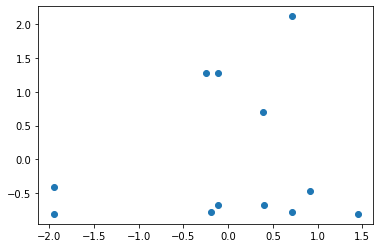

In [9]:
plt.scatter(data[:,0], data[:,1])

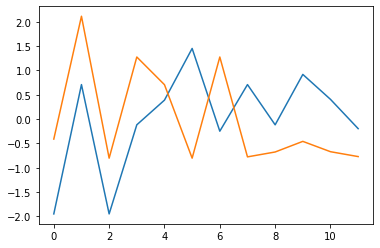

In [10]:
plt.plot(data)

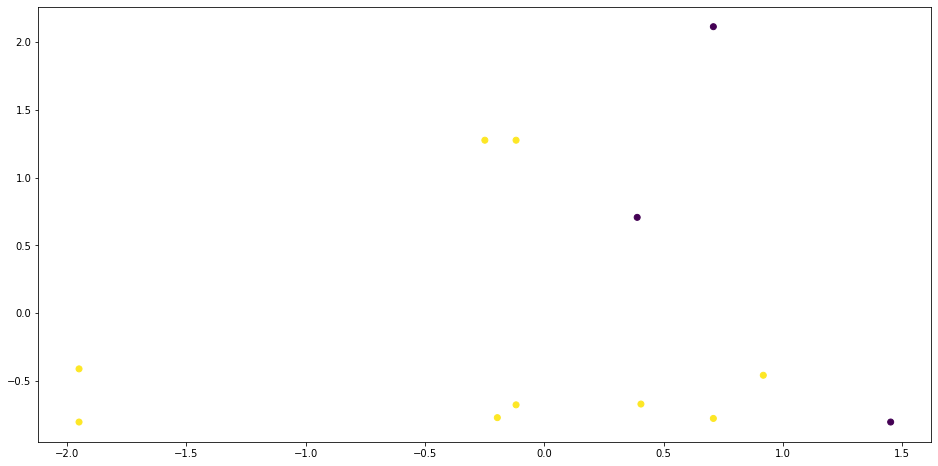

In [11]:
db = DBSCAN(min_samples=2).fit(data)
labels = db.labels_
core_samples = np.zeros_like(labels, dtype = bool)
core_samples[db.core_sample_indices_] = True
plt.figure(figsize=(16,8))
plt.scatter(data[:,0], data[:,1], c=core_samples)

# As you can see above the dbscan is able to cluster the above dataset but again as the dataset is pretty small the clustering is not too good

In [12]:
from scipy import stats

In [13]:
stats.pearsonr(data[:,0], data[:,1])

(0.12456740951041757, 0.6997018548894391)

In [14]:
data[:,0]

array([-1.9495875 ,  0.70858413, -1.9495875 , -0.11817003,  0.38939422,
        1.4516163 , -0.24898554,  0.70858413, -0.11817003,  0.917889  ,
        0.4050921 , -0.19665934], dtype=float32)

In [15]:
data[:,1]

array([-0.41123074,  2.1136718 , -0.8035345 ,  1.2759706 ,  0.70668757,
       -0.8035345 ,  1.2759706 , -0.7769876 , -0.6766995 , -0.4584252 ,
       -0.6708002 , -0.7710883 ], dtype=float32)

# positive correlation